In [ ]:
Name: Himanshu Tatawat
Roll Number: 12040660
References Used to Complete the Assignment
a.https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction
b.https://www.kaggle.com/code/mrinath/starter-life-expectancy-who-9536c272-3
c.https://www.kaggle.com/code/vikarna/who-health-data-eda


In [ ]:
!pip install -q kaggle







  error: subprocess-exited-with-error
  
  Running setup.py install for kaggle did not run successfully.
  exit code: 1
  
  [97 lines of output]
  C:\Python310\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  running install
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\kaggle
  copying kaggle\api_client.py -> build\lib\kaggle
  copying kaggle\cli.py -> build\lib\kaggle
  copying kaggle\configuration.py -> build\lib\kaggle
  copying kaggle\rest.py -> build\lib\kaggle
  copying kaggle\__init__.py -> build\lib\kaggle
  creating build\lib\kaggle\api
  copying kaggle\api\kaggle_api.py -> build\lib\kaggle\api
  copying kaggle\api\kaggle_api_extended.py -> build\lib\kaggle\api
  copying kaggle\api\__init__.py -> build\lib\kaggle\api
  creating build\lib\kaggle\models
  copying

In [ ]:
!pip install xgboost

In [ ]:
!pip install mlxtend

In [ ]:
!pip install statsmodels

In [ ]:
# Import the file to be read

In [ ]:
from google.colab import files files.upload()

SyntaxError: invalid syntax (3825512183.py, line 1)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

# TRAIN DATA

In [ ]:
df_train = pd.read_csv("train_NYTaxi.csv", nrows=200000, parse_dates=["pickup_datetime"])
df_test = pd.read_csv("test_NYTaxi.csv", parse_dates=["pickup_datetime"])

# EXPLORATORY DATA ANALYSIS

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         100000 non-null  int64              
 1   key                100000 non-null  object             
 2   fare_amount        100000 non-null  float64            
 3   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   100000 non-null  float64            
 5   pickup_latitude    100000 non-null  float64            
 6   dropoff_longitude  100000 non-null  float64            
 7   dropoff_latitude   100000 non-null  float64            
 8   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
 df_train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,11.333564,-72.448815,39.887315,-72.479259,39.890066,1.682150
std,28867.657797,9.810826,10.869743,6.383817,12.774264,6.260724,1.308617
min,0.000000,-9.300000,-736.516667,-74.015935,-2319.633333,-74.011085,0.000000
25%,24999.750000,6.000000,-73.992133,40.734793,-73.991443,40.734034,1.000000
50%,49999.500000,8.500000,-73.981850,40.752464,-73.980214,40.753093,1.000000
75%,74999.250000,12.500000,-73.967172,40.767032,-73.963718,40.768042,2.000000
max,99999.000000,394.000000,40.801777,404.666667,40.787037,44.640672,6.000000


In [ ]:
df_train.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [ ]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df_train, test_size=0.1)
len(train_df), len(val_df)

(90000, 10000)

In [ ]:
# Minimum Fare-Amount is Negative, so we have to remove these observations

In [ ]:
df_train = df_train[df_train["fare_amount"]>=0]

In [ ]:
len(df_train)

99997

In [ ]:
# Histogram of fare amount

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


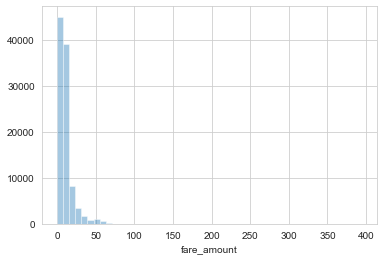

In [ ]:
sns.distplot(df_train["fare_amount"], kde=False);

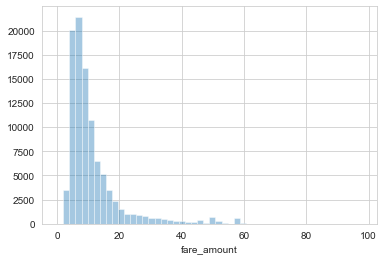

In [ ]:
sns.distplot(df_train[df_train["fare_amount"]<100]["fare_amount"], kde=False);

# Remove Missing Data

In [ ]:
print(df_train.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
df_train = df_train.dropna(how='any', axis='rows')

In [ ]:
len(df_train)

99997

# Test Data

In [ ]:
df_test = pd.read_csv("NY_test.csv")

In [ ]:
df_test.head(5)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
# New York city coordinates
latitude = 40.7141667
longitude = -74.006889

In [ ]:
# Here we will try to define bounding box of interest by [long_min long_max, latt_min, latt_max] using the minimum and maximum coordinates from text.csv
# This will help us to make sure to train a model for the test set

# Minimum and Maximum Longitude Test set

In [ ]:
print(min(df_test["pickup_longitude"].min(), df_test["dropoff_longitude"].min()))

-74.263242


In [ ]:
 print(max(df_test["pickup_longitude"].max(), df_test["dropoff_longitude"].max()))

-72.986532


In [ ]:
print(min(df_train["pickup_longitude"].min(), df_train["dropoff_longitude"].min()))

-2319.633333


In [ ]:
print(max(df_train["pickup_longitude"].max(), df_train["dropoff_longitude"].max()))

40.801777


# Minimum and Maximum Latitude Test set

In [ ]:
print(min(df_test["pickup_latitude"].min(), df_test["dropoff_latitude"].min()))

40.568973


In [ ]:
 print(max(df_test["pickup_latitude"].max(), df_test["dropoff_latitude"].max()))

41.709555


In [ ]:
print(min(df_train["pickup_latitude"].min(), df_train["dropoff_latitude"].min()))

-74.015935


In [ ]:
print(max(df_train["pickup_latitude"].max(), df_train["dropoff_latitude"].max()))

404.666667


# Function for selecting the bounding box

In [ ]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [ ]:
# Load Image of NYC Map for visualization

In [ ]:
import PIL
import urllib.request
nyc_map = np.array(PIL.Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/spathan1985/NewYorkCityTaxiFarePrediction/master/download/nyc_-74.5_-72.8_40.5_41.8.png')))

import urllib.request

from PIL import Image
nyc_map = plt.imread(urllib.request.urlreq('https://raw.githubusercontent.com/spathan1985/NewYorkCityTaxiFarePrediction/master/download/nyc_-74.5_-72.8_40.5_41.8.png'))

#urllib.request.urlretrieve('https://raw.githubusercontent.com/spathan1985/NewYorkCityTaxiFarePrediction/master/download/nyc_-74.5_-72.8_40.5_41.8.png', 'img1')

#img = Image.open('img1')
#nyc_map = plt.imread('img1')

In [ ]:
nyc_map.shape

(1262, 1242, 4)

In [ ]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [ ]:
# 

In [ ]:
print("New size {}".format(len(df_train)))

New size 99997


In [ ]:
# Function will be used for plotting data on NYC Map

In [ ]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig ,axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"], alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

In [ ]:
# Plotting Training data on map

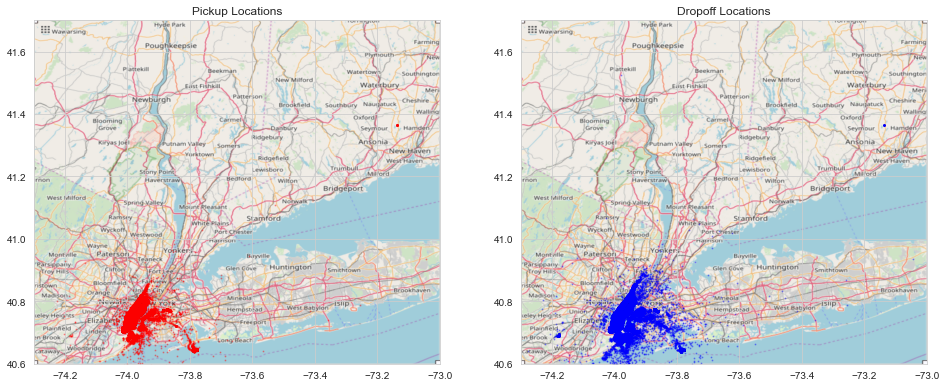

In [ ]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

# Plotting tesgting data on map

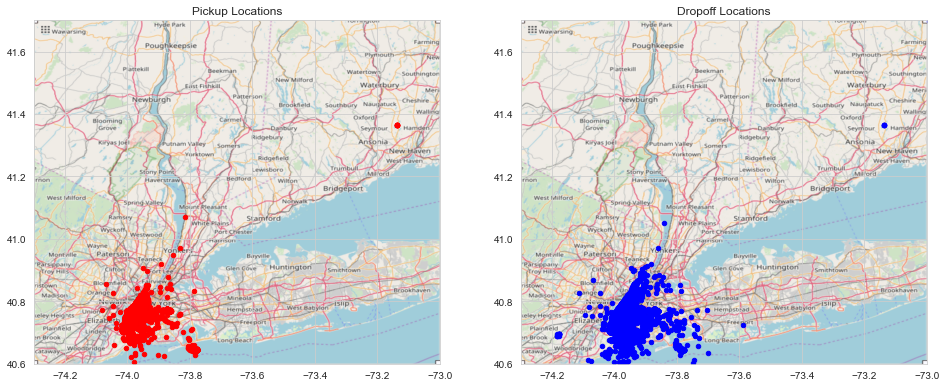

In [ ]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

# Scatter Plot

In [ ]:
def plot_hires(df, BB, figsize=(12, 12), ax = None, c=('r','b')):
    if ax==None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c = c[0], s=0.01 , alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c = c[1], s=0.01, alpha=0.5)

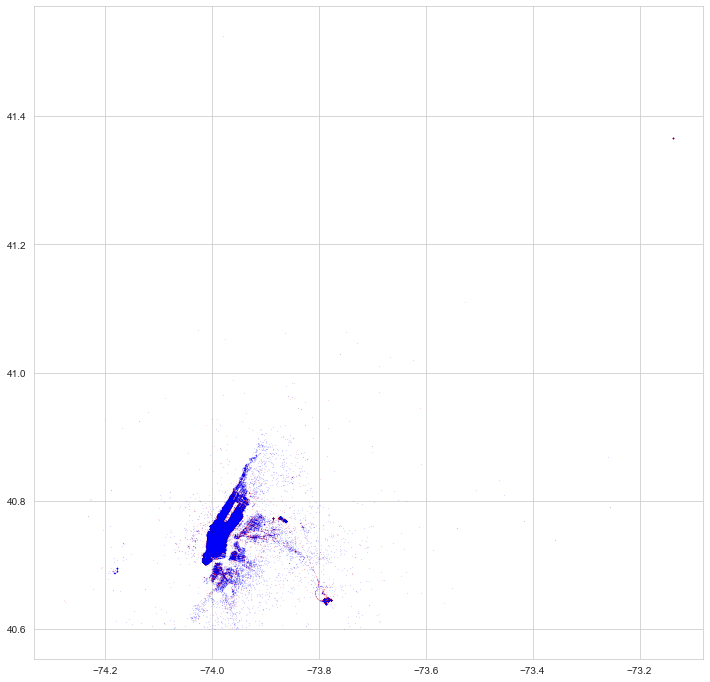

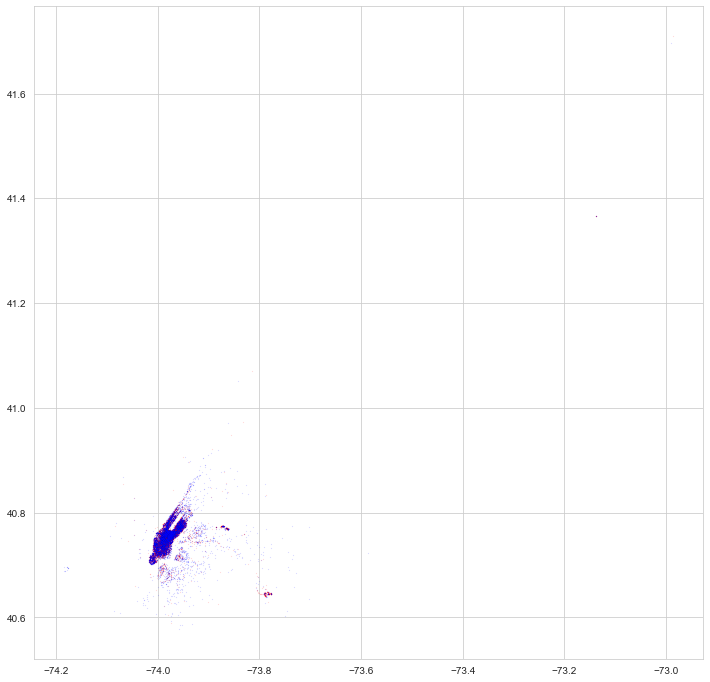

In [ ]:
plot_hires(df_train, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df_test, (-74.26, -72.98, 40.57, 41.71))

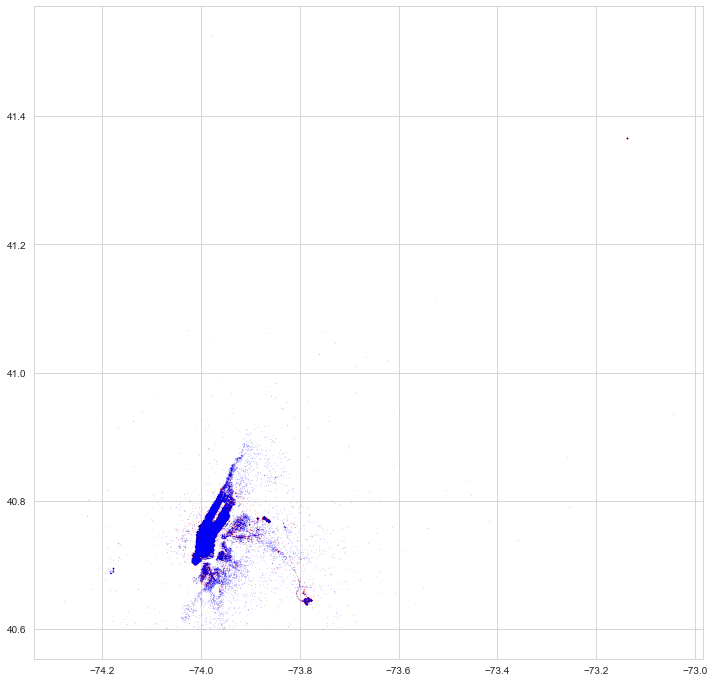

In [ ]:
plot_hires(df_train, BB)

In [ ]:
# add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday())
df_train['hour'] = df_train["pickup_datetime"].apply(lambda t: t.hour)

# Distance and Time Visualization
1. The longer the distance between pickup and dropoff locations, the higher the fare/
2. Some trips, like to/from an airport are fixed fee.
3. Fare at night is different from the day time

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) 


The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles

In [ ]:
df_train["distance_miles"] = distance(df_train["pickup_latitude"], df_train["pickup_longitude"],
                                      df_train["dropoff_latitude"], df_train["dropoff_longitude"])

In [ ]:
df_train.head(2)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour,distance_miles
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,2009,2,19,0.693978
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,2012,0,16,0.655579


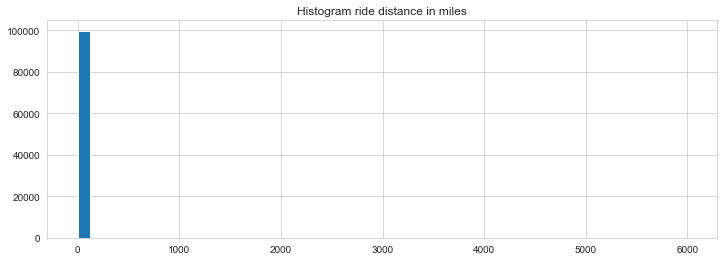

In [ ]:
df_train["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [ ]:
df_train["distance_miles"].describe()

count    99997.000000
mean        12.267329
std        229.834094
min          0.000000
25%          0.754868
50%          1.312513
75%          2.416031
max       5990.302852
Name: distance_miles, dtype: float64

1. It seems most rides are just short rides, with a small peak at ~13 miles. This peak could be due to airport drives.1

In [ ]:
df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1461844711.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()


,distance_miles,fare_amount
passenger_count,,
0,16.433893,9.146341
1,12.435971,11.189116
2,11.690293,11.886414
3,12.262636,11.484771
4,17.264528,11.621013
5,8.784545,11.310228
6,16.584050,12.102424


1. Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

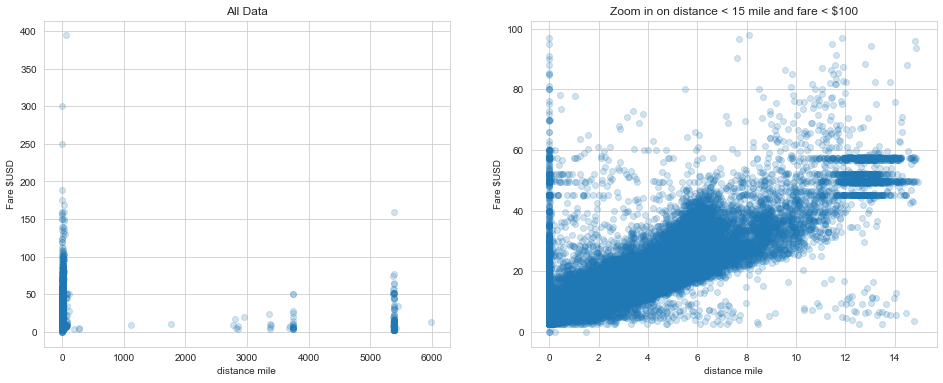

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].scatter(df_train["distance_miles"], df_train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom in some part of the data
idx = ((df_train['distance_miles'] <15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

# Some Important Observations
1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.

2. The horizontal lines in the right plot indicate again the fixed fare trips to/from JFK airport. Overall there seems to be a linear relation between distance and fare with an average rate of +/- 100/20 = 5 Rs /mile

In [ ]:
# remove datapoints with distance <0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 99997
New size: 96582


In [ ]:
jfk = ( -73.77733654660155, 40.64192610324968)
nyc = ( -74.06074054332467,40.71276533723994)


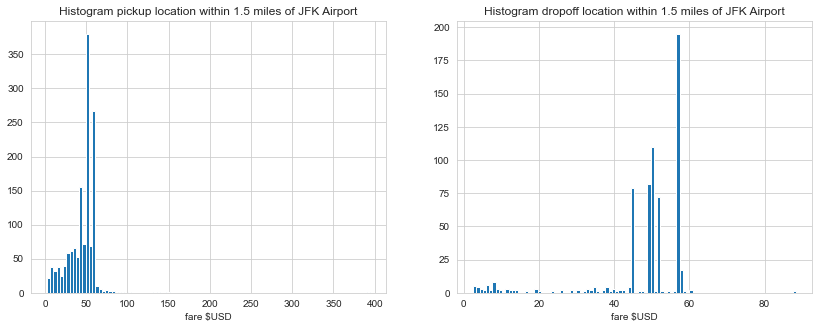

In [ ]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (distance(df_train.pickup_latitude, df_train.pickup_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} miles of {}'.format(range, name))

    idx = (distance(df_train.dropoff_latitude, df_train.dropoff_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} miles of {}'.format(range, name));
    
plot_location_fare(jfk, 'JFK Airport')

In [ ]:
# other airports
ewr = (-74.17449458858238, 40.68976729905001)
lgr = (-73.87371915555181,40.77699200914857)

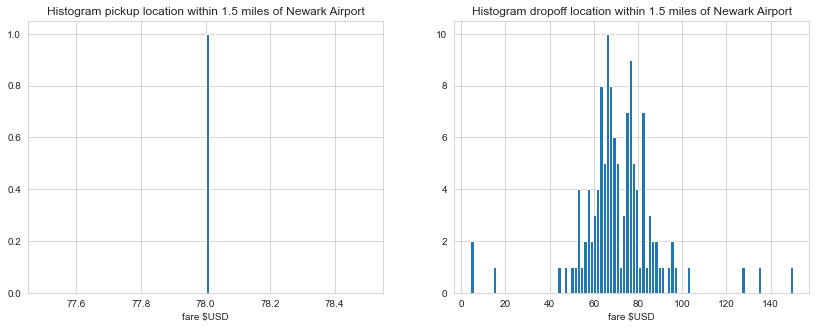

In [ ]:
plot_location_fare(ewr, 'Newark Airport')

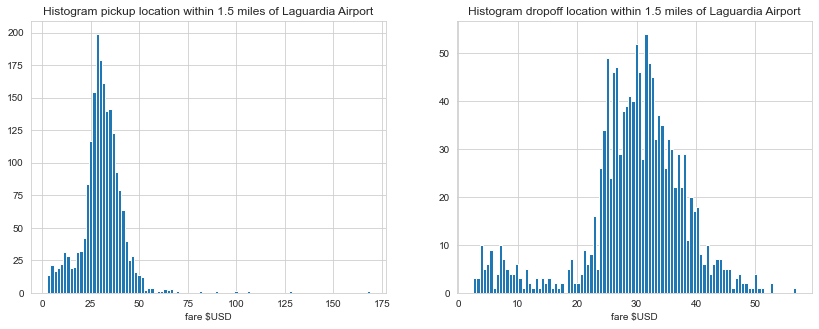

In [ ]:
plot_location_fare(lgr, 'Laguardia Airport')

Fare at night is different from the day time


In [ ]:
df_train["fare_per_mile"] = df_train["fare_amount"] / df_train["distance_miles"]


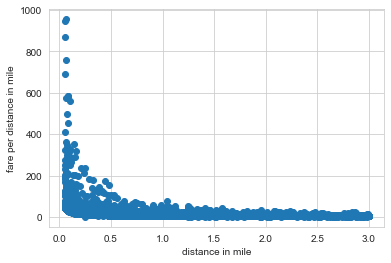

In [ ]:
idx = (df_train["distance_miles"] <3) & (df_train["fare_amount"] < 100)
plt.scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile");

# Pivot Table

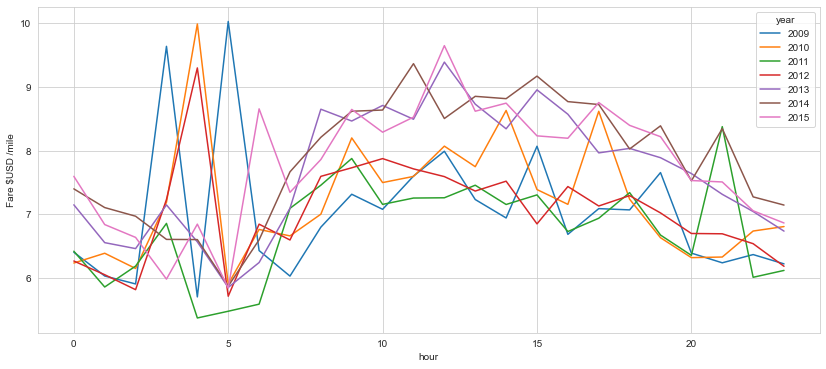

In [ ]:
df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14,6))
plt.ylabel("Fare $USD /mile");

 Fare and TIme dependency per year

# Relevance of direction for calculation of fare amount

In [ ]:
df_train["delta_lon"] = df_train["pickup_longitude"] - df_train["dropoff_longitude"]
df_train["delta_lat"] = df_train["pickup_latitude"] - df_train["dropoff_latitude"]

In [ ]:
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0]= (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

In [ ]:
df_train['direction'] = calculate_direction(df_train.delta_lon, df_train.delta_lat)

#### Fare varies with pickup location

In [ ]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train["pickup_latitude"], df_train["pickup_longitude"])

In [ ]:
df_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour,distance_miles,fare_per_mile,delta_lon,delta_lat,direction,distance_to_center
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,2009,2,19,0.693978,7.060739,-0.008433,-0.007749,-137.420405,3.425044
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,2012,0,16,0.655579,7.474305,-0.000915,-0.009463,-95.522896,7.486738
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2011,1,13,1.687618,4.088602,-0.017871,-0.020333,-131.312757,5.830126
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,2010,3,21,3.169845,4.448168,-0.022233,-0.042672,-117.520452,3.018424
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,2009,4,22,2.982950,4.056387,-0.026624,-0.038168,-124.897611,2.966561


C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1045857806.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, ax=axs[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_17620\1045857806.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(im, ax=axs[1])


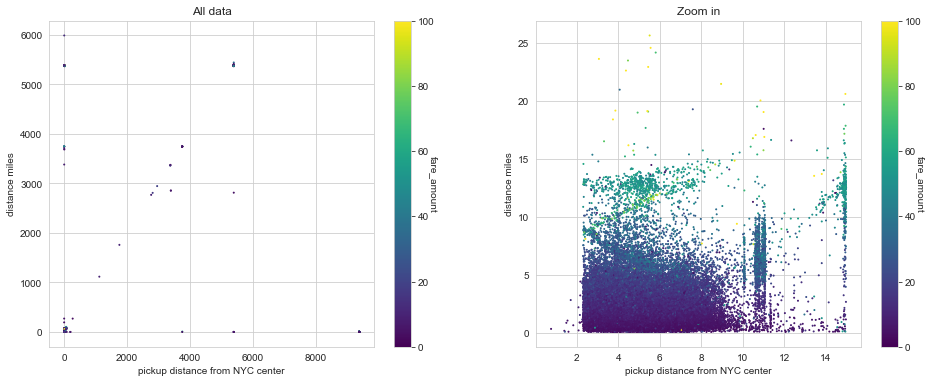

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train["distance_to_center"], df_train["distance_miles"], c=np.clip(df_train["fare_amount"], 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)

axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')

cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)


idx = (df_train["distance_to_center"] < 15) & (df_train["distance_miles"] < 35)
im = axs[1].scatter(df_train[idx]["distance_to_center"], df_train[idx]["distance_miles"], 
                     c=np.clip(df_train[idx]["fare_amount"], 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

# Baseline Model and Submission

In [ ]:
# add new column to dataframe with distance in km
df_test['distance_miles'] = distance(df_test["pickup_latitude"], df_test["pickup_longitude"], 
                                     df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['distance_to_center'] = distance(nyc[1], nyc[0], df_test["dropoff_latitude"], df_test["dropoff_longitude"])
df_test['hour'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).year)
df_test['weekday'] = df_test["pickup_datetime"].apply(lambda t: pd.to_datetime(t).weekday())

In [ ]:
df_train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour,distance_miles,fare_per_mile,delta_lon,delta_lat,direction,distance_to_center
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,2009,2,19,0.693978,7.060739,-0.008433,-0.007749,-137.420405,3.425044
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,2012,0,16,0.655579,7.474305,-0.000915,-0.009463,-95.522896,7.486738
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2011,1,13,1.687618,4.088602,-0.017871,-0.020333,-131.312757,5.830126
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,2010,3,21,3.169845,4.448168,-0.022233,-0.042672,-117.520452,3.018424
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,2009,4,22,2.982950,4.056387,-0.026624,-0.038168,-124.897611,2.966561


In [ ]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_miles,distance_to_center,hour,year,weekday
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,1.443607,4.674742,13,2015,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,1.507044,3.718320,13,2015,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.384398,4.831384,11,2011,5
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.218529,4.555999,21,2012,5
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,3.347514,4.366584,21,2012,5


In [ ]:
# define dataset
# select points 15 miles near NYC center and remove zero passenger datapoints
idx = (df_train["distance_to_center"] < 15) & (df_train["passenger_count"] != 0)

features = ['year', 'hour', 'distance_miles', 'passenger_count','weekday','distance_to_center']

X = df_train[idx][features].values
y = df_train[idx]['fare_amount'].values

In [ ]:
print(X.shape, y.shape)

(94954, 6) (94954,)


In [ ]:
# define some handy analysis support function
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [ ]:

# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)


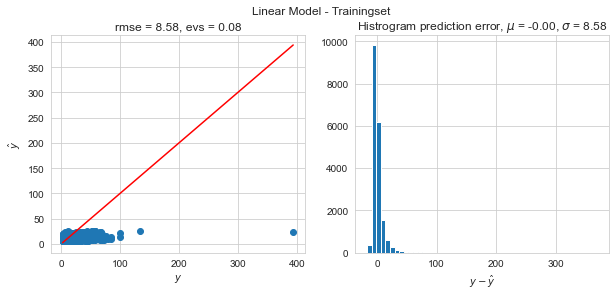

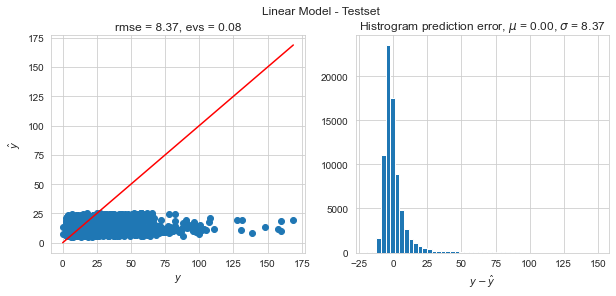

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)

plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

# K FOLD CROSS VALIDATION

In [ ]:
from random import sample

In [ ]:
def create_folds(df_train, k = 10):
    train_test_split = []
    size = len(df_train)
    num_of_elements = int(size / k)
    for i in range(k):
        new_sample = sample(df_train, num_of_elements)
        train_test_split.append(new_sample)
        for row in new_sample:
            df_train.remove(row)
    if len(df_train) != 0:
        for rows in range(len(dataset)):
            train_test_split[rows].append(dataset[rows])
        dataset.clear()
    return train_test_split

# LINEAR REGRESSION

In [ ]:
# NON PARAMETRIC

In [ ]:
import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
from math import factorial


# Hyperparameters, change according to your need
n = 75
k = 5
estimator = "mean"
steps = 250
m, c = 2, 5
noise_mu, noise_sigma = 0, 0.2


plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 130
plt.ioff()
fig, ax = plt.subplots()

x = np.random.random((n, 1))
x = np.sort(x, axis=0)
y = x * m + c + np.random.normal(noise_mu, noise_sigma, size=(n, 1))

out_x, out_y = [], []
y_range = np.linspace(min(y), max(y), 10).reshape(-1, )


def animate(t):
    point = t / steps
    all_distances = []
    colors = ["teal"] * n
    sizes = [3] * n

    for ind, j in enumerate(x):
        all_distances.append([abs(j - point), ind])
    all_distances.sort()
    all_distances = all_distances[:k]
    all_x, all_y = [], []
    for _, index in all_distances:
        all_x.append(x[index])
        all_y.append(y[index])
        colors[index] = "red"
        sizes[index] = 9
    out_x.append(point)
    all_y = np.array(all_y)
    if estimator == "mean": out_y.append(np.mean(all_y))
    else: out_y.append(np.median(all_y))
    
    ax.collections.clear()
    plt.scatter(x, y, s=sizes, c=colors)
    plt.fill_betweenx(y_range, min(all_x), max(all_x), 
                      color='yellowgreen', alpha=0.2)
    plt.plot(out_x, out_y, 'b', linewidth=1)
    plt.xlim(-0.02, 1.02)


matplotlib.animation.FuncAnimation(fig, animate, frames=steps)

# 1. Does the number of passengers affect the fare?

In [ ]:
train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\90445966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].median()


,H_Distance(in kms),fare_amount
passenger_count,,
0,1.973443,7.3
1,2.089736,8.5
2,2.209295,8.5
3,2.104322,8.5
4,2.213078,8.5
5,2.108830,8.5
6,2.145328,9.0


In [ ]:
train['passenger_count'] = pd.to_numeric(train['passenger_count'])

**There are some readings with 0 passenger_count. This appears to be absurd so we will remove these entries from the data.**

In [ ]:
train = train[train['passenger_count']>0]

In [ ]:
len(train)

99626

In [ ]:
train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].median()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\90445966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].median()


,H_Distance(in kms),fare_amount
passenger_count,,
1,2.089736,8.5
2,2.209295,8.5
3,2.104322,8.5
4,2.213078,8.5
5,2.108830,8.5
6,2.145328,9.0


In [ ]:
train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16928\2094915717.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('passenger_count')['H_Distance(in kms)', 'fare_amount'].mean()


,H_Distance(in kms),fare_amount
passenger_count,,
1,19.868967,11.189200
2,18.813703,11.886414
3,19.734799,11.484771
4,27.784564,11.621013
5,14.137355,11.310228
6,26.689440,12.102424


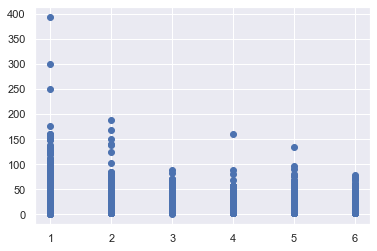

In [ ]:
plt.scatter(train['passenger_count'], train['fare_amount'])

<AxesSubplot:>

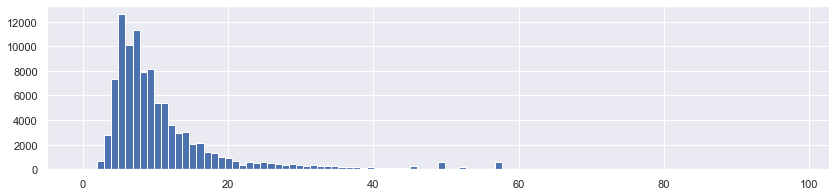

In [ ]:
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))


Text(0.5, 1.0, 'Zoom in on distance < 10 kms and fare < 100')

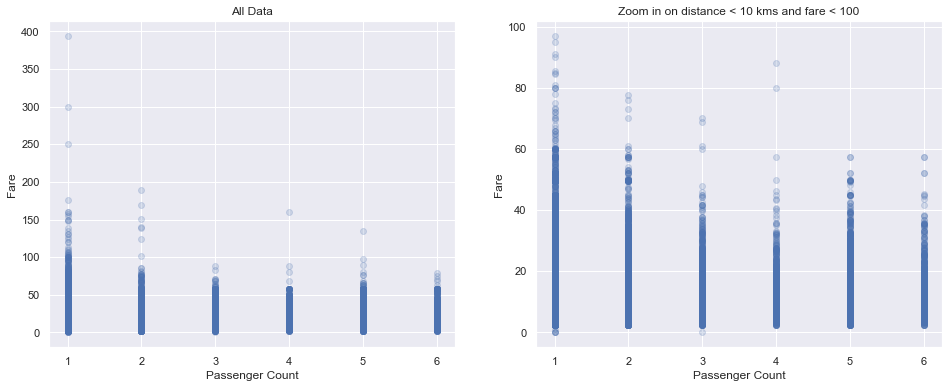

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].scatter(train["passenger_count"], train["fare_amount"], alpha=0.2)
axs[0].set_xlabel("Passenger Count")
axs[0].set_ylabel("Fare")
axs[0].set_title("All Data")

# Zoom in some part of the data
idx = ((train['H_Distance(in kms)'] <10) & (train["fare_amount"] < 100))
axs[1].scatter(train[idx]["passenger_count"], train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("Passenger Count")
axs[1].set_ylabel("Fare")
axs[1].set_title("Zoom in on distance < 10 kms and fare < 100")

In [ ]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance(in kms),Year,Month,Date,Day of Week,Hour
count,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000,99626.000000
mean,50000.812930,11.342255,-72.446784,39.882461,-72.455557,39.889685,1.688395,19.616779,2011.739425,6.267490,15.695511,3.030113,13.513812
std,28867.537915,9.821247,10.877626,6.283934,10.619893,6.263327,1.307039,368.293185,1.862030,3.431703,8.693116,1.950045,6.515256
min,0.000000,0.000000,-736.516667,-74.015935,-121.391318,-74.011085,1.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,25002.250000,6.000000,-73.992133,40.734777,-73.991443,40.734021,1.000000,1.214832,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,50011.500000,8.500000,-73.981851,40.752459,-73.980215,40.753082,1.000000,2.112976,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,74997.750000,12.500000,-73.967170,40.767024,-73.963722,40.768036,2.000000,3.887745,2013.000000,9.000000,23.000000,5.000000,19.000000
max,99999.000000,394.000000,40.801777,42.603366,40.787037,44.640672,6.000000,8762.401420,2015.000000,12.000000,31.000000,6.000000,23.000000


In [ ]:
train = train[train["H_Distance(in kms)"]>0]

In [ ]:
train["fare_per_mile"] = train["fare_amount"] / train["H_Distance(in kms)"]

<AxesSubplot:xlabel='passenger_count'>

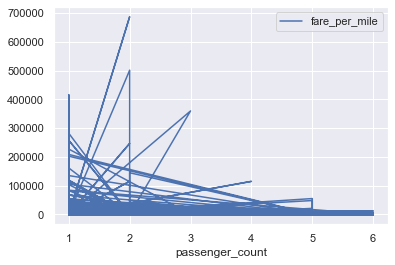

In [ ]:
train.plot(x='passenger_count', y='fare_per_mile')

Text(0.5, 1.0, 'Zoom in on distance < 10 kms and fare < 100')

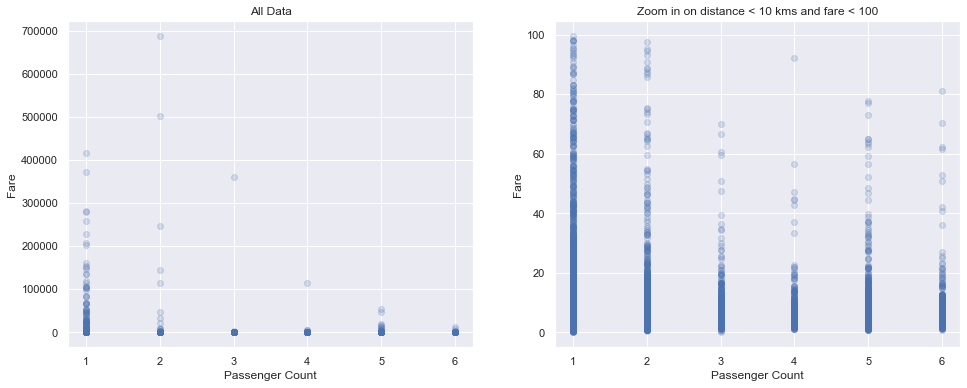

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].scatter(train["passenger_count"], train["fare_per_mile"], alpha=0.2)
axs[0].set_xlabel("Passenger Count")
axs[0].set_ylabel("Fare")
axs[0].set_title("All Data")

# Zoom in some part of the data
idx = ((train['H_Distance(in kms)'] <10) & (train["fare_per_mile"] < 100))
axs[1].scatter(train[idx]["passenger_count"], train[idx]["fare_per_mile"], alpha=0.2)
axs[1].set_xlabel("Passenger Count")
axs[1].set_ylabel("Fare")
axs[1].set_title("Zoom in on distance < 10 kms and fare < 100")

**The above results show that there is not much difference in fares as the no. of passengers increases. So the number of passengers does not affect on the fare amount charged.**

# 2. Does the date and time of pickup affect the fare?

In [ ]:
train = train[train["H_Distance(in kms)"]>0]

In [ ]:
train["fare_per_mile"] = train["fare_amount"] / train["H_Distance(in kms)"]


# fdsjfljasdlfj

In [ ]:
train.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance(in kms),Year,Month,Date,Day of Week,Hour,fare_per_mile
count,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000,96769.000000
mean,50019.932447,11.337033,-73.824594,40.640379,-73.833627,40.647816,1.688010,20.195943,2011.744226,6.266604,15.689870,3.029855,13.513904,96.268110
std,28869.616398,9.662458,4.353932,3.079141,3.636980,3.033751,1.306114,373.674772,1.866012,3.434614,8.690239,1.950308,6.514711,4490.873470
min,0.000000,0.000000,-736.516667,-74.015935,-121.391318,-74.011085,1.000000,0.000084,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,25028.000000,6.000000,-73.992348,40.736252,-73.991630,40.735482,1.000000,1.281072,2010.000000,3.000000,8.000000,1.000000,9.000000,2.964528
50%,50053.000000,8.500000,-73.982132,40.753127,-73.980677,40.753782,1.000000,2.177932,2012.000000,6.000000,16.000000,3.000000,14.000000,3.816299
75%,75026.000000,12.500000,-73.968451,40.767431,-73.965490,40.768362,2.000000,3.973716,2013.000000,9.000000,23.000000,5.000000,19.000000,5.048440
max,99999.000000,394.000000,40.801777,42.364088,40.787037,44.640672,6.000000,8762.401420,2015.000000,12.000000,31.000000,6.000000,23.000000,687465.968469


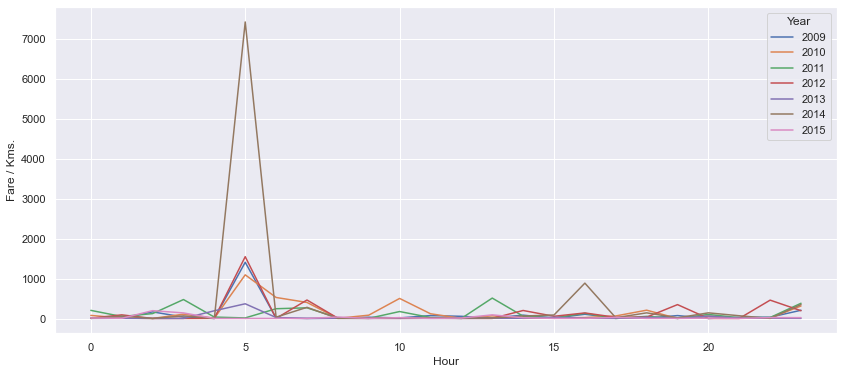

In [ ]:
train.pivot_table("fare_per_mile", index="Hour", columns="Year").plot(figsize=(14,6))
plt.ylabel("Fare / Kms.");

**This steep rise in fare could be because of fare charged(even small) for very small distance so we have to delete the distances with less than .5 kms**

In [ ]:
train = train[train["H_Distance(in kms)"]>0.5]

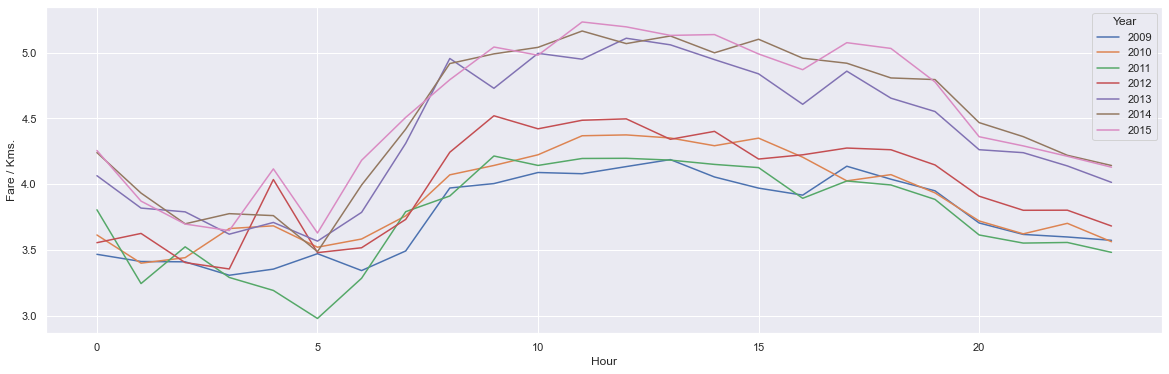

In [ ]:
train.pivot_table("fare_per_mile", index="Hour", columns="Year").plot(figsize=(20,6))
plt.ylabel("Fare / Kms.");

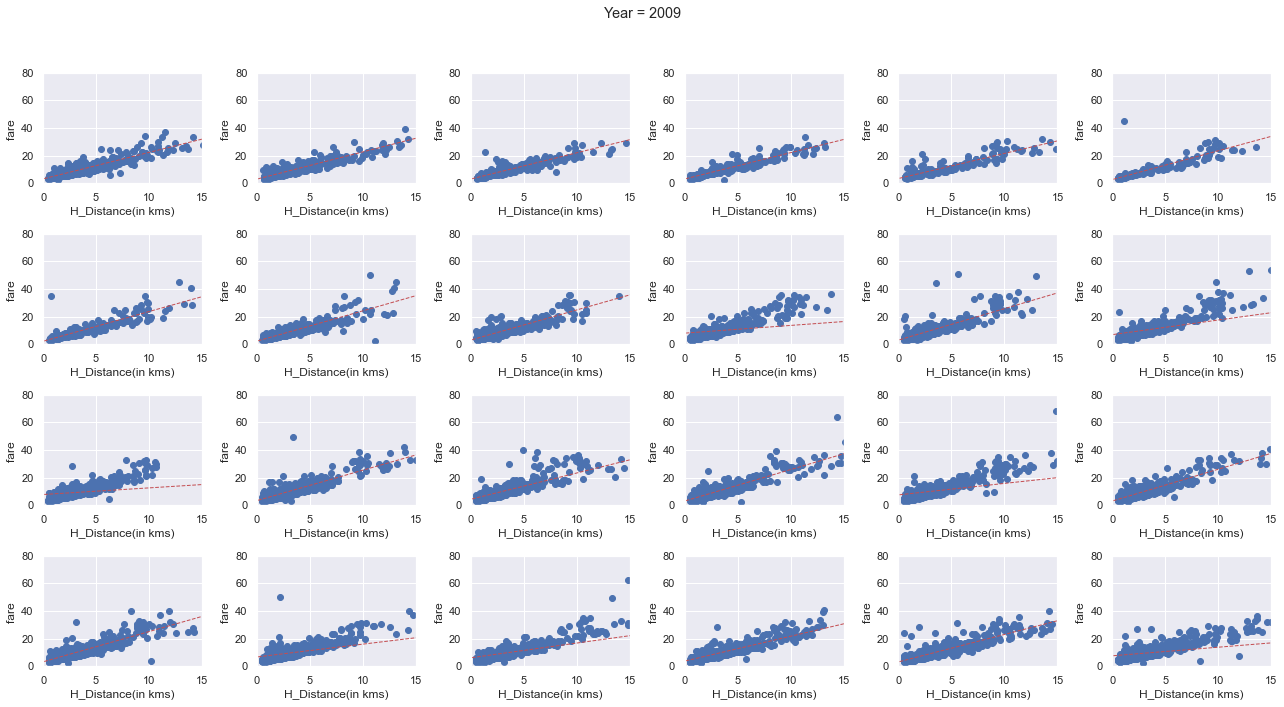

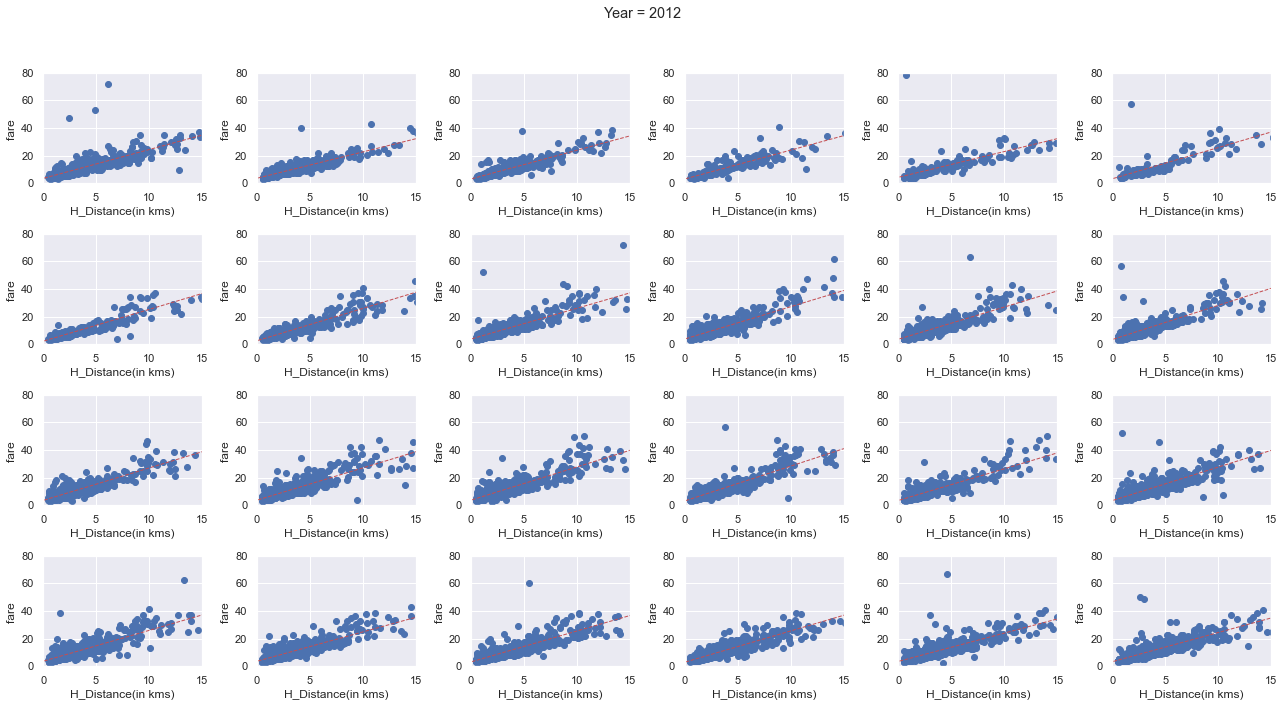

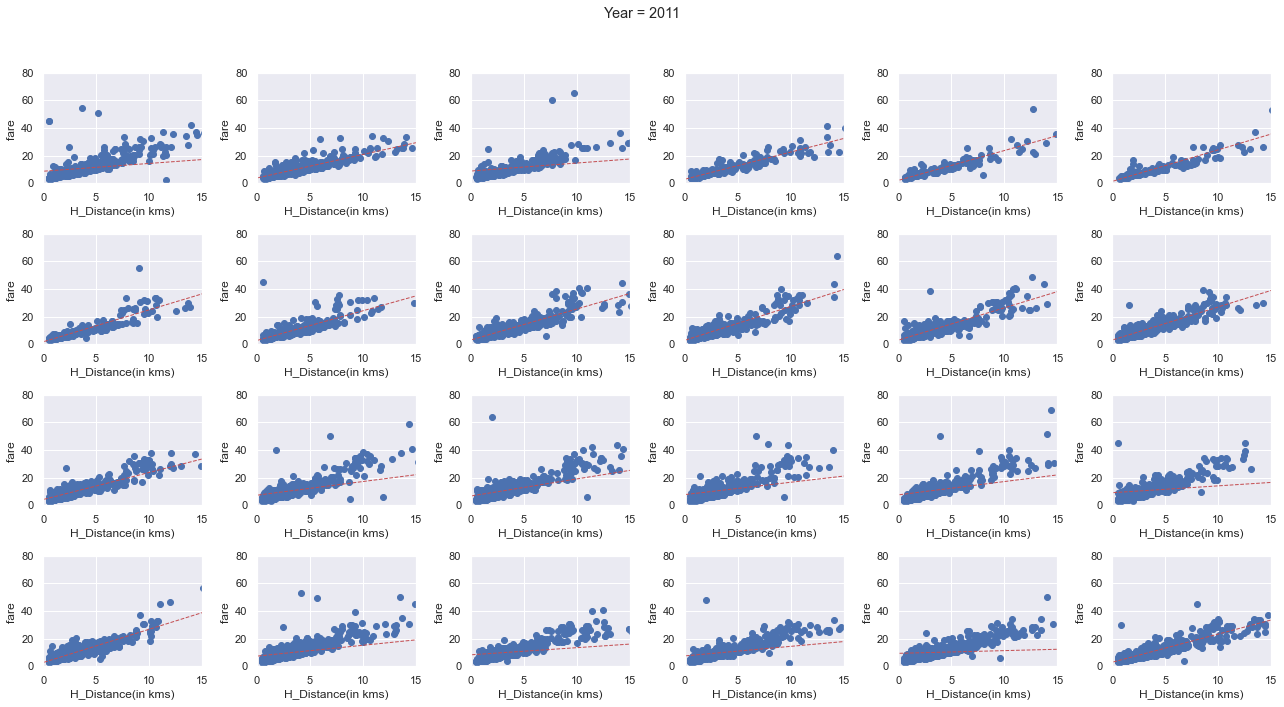

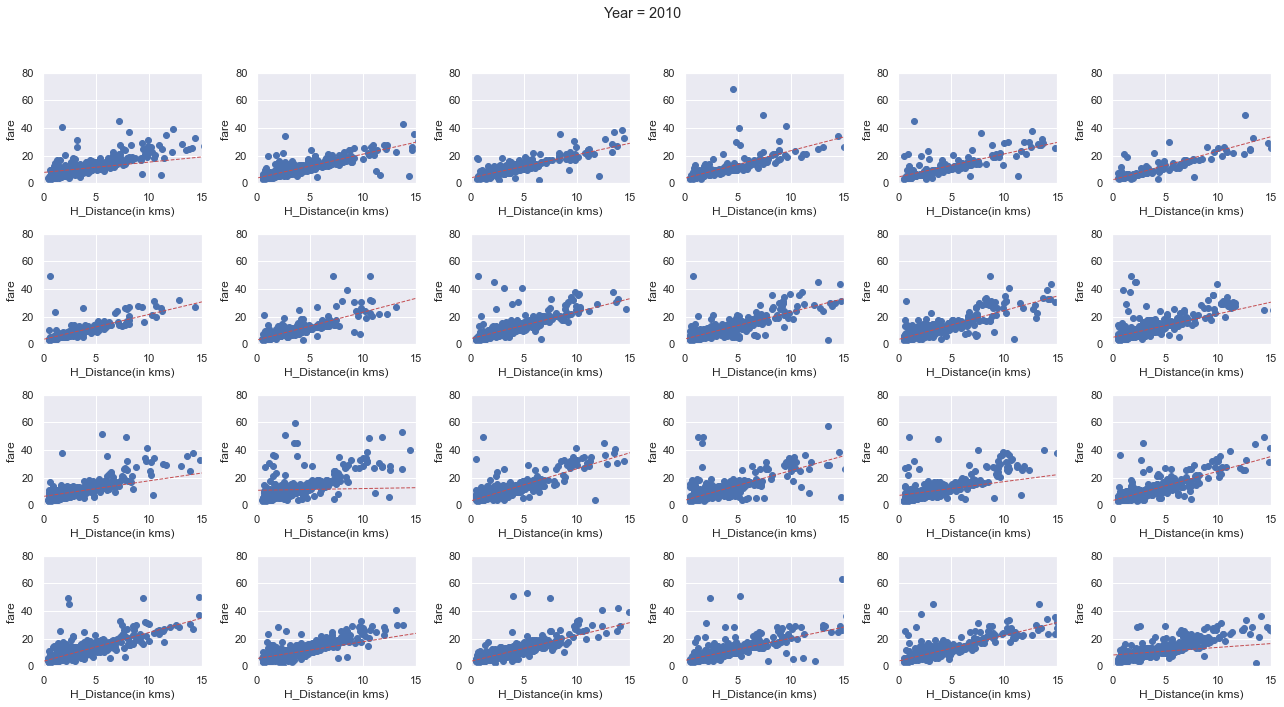

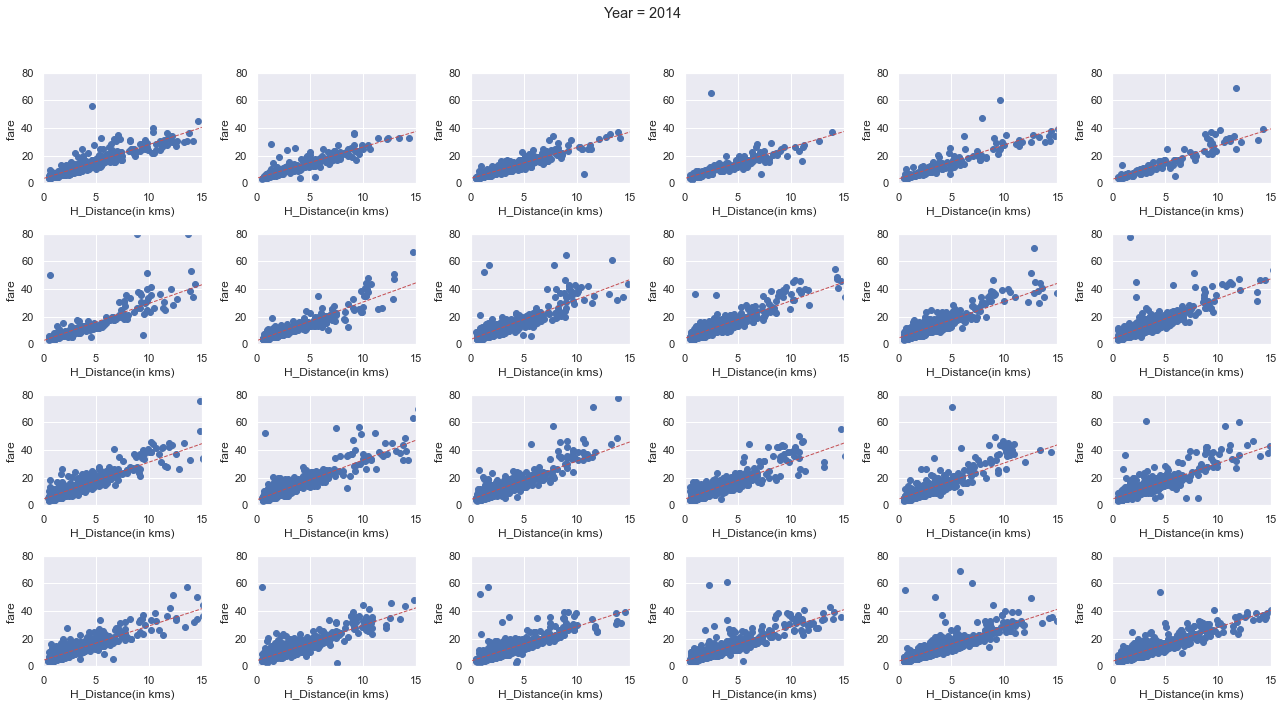

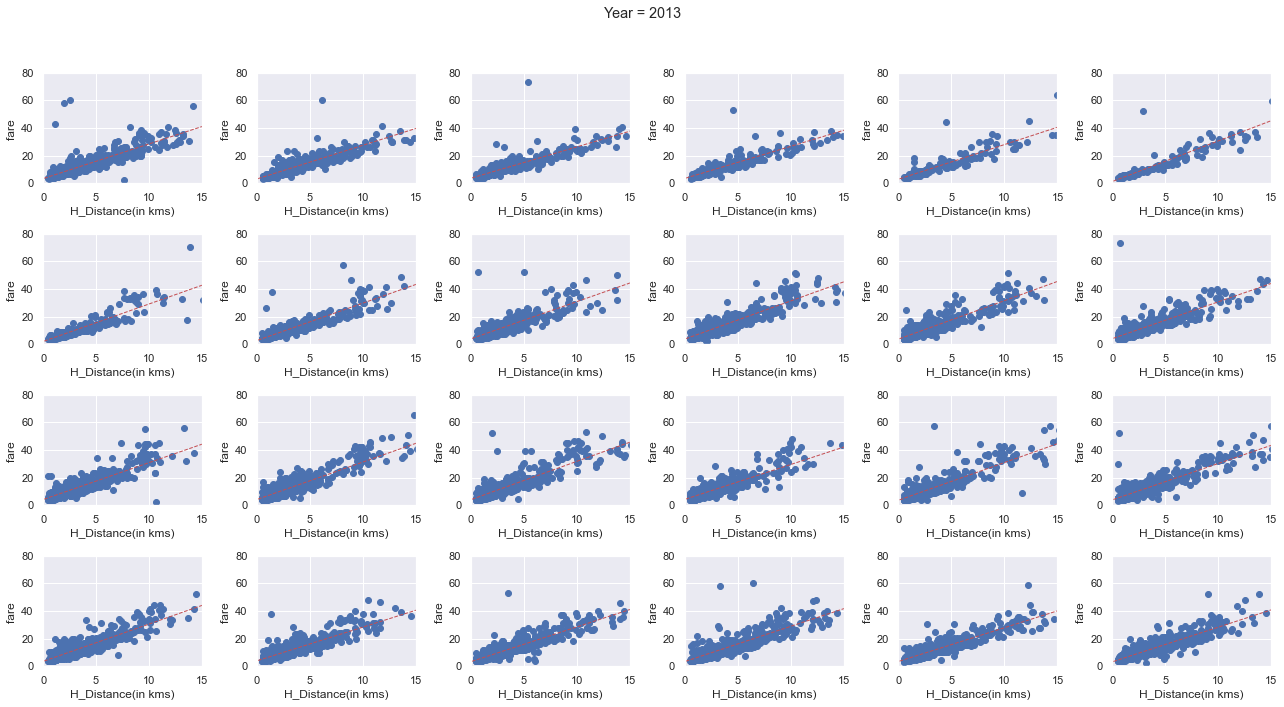

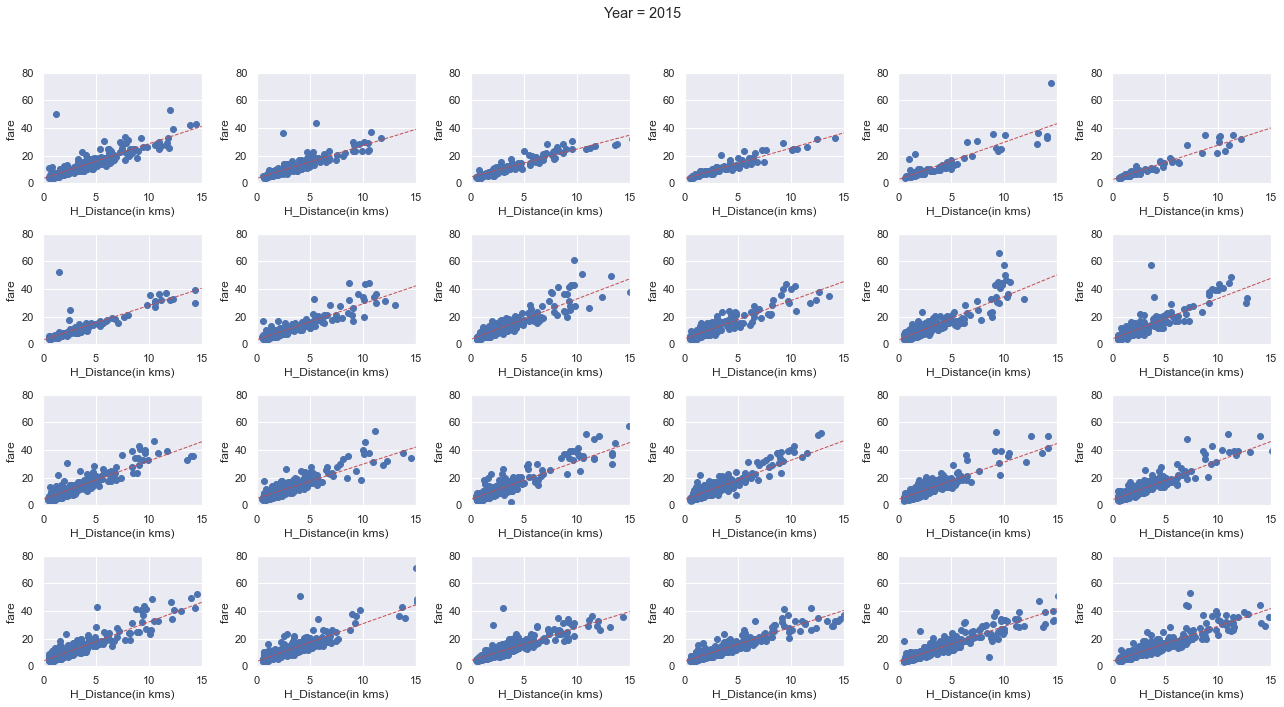

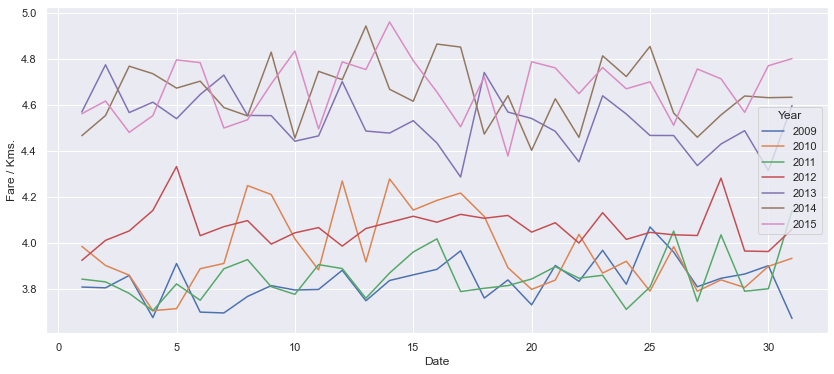

In [ ]:
train.pivot_table("fare_per_mile", index="Date", columns="Year").plot(figsize=(14,6))
plt.ylabel("Fare / Kms.");

**So in the above figures we can observe that date of the month and hour of the day affects on the fare charged.**

# 3. Does the day of the week affect the fare?

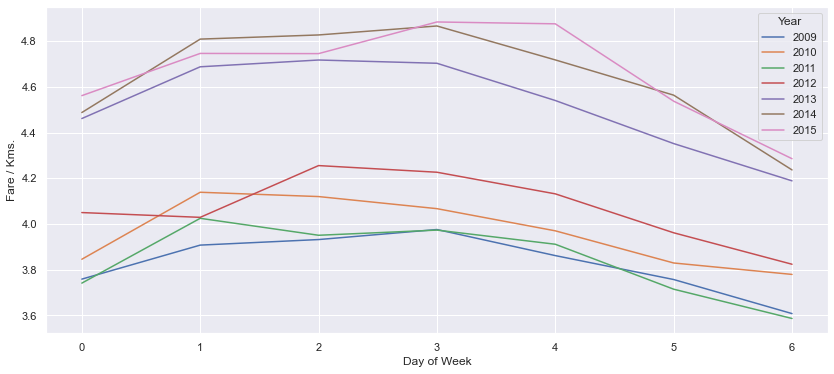

In [ ]:
train.pivot_table("fare_per_mile", index="Day of Week", columns="Year").plot(figsize=(14,6))
plt.ylabel("Fare / Kms.");

**The fare is also affected by the day of week**


# 4. Does the distance affect the fare?

In [ ]:
from sklearn.linear_model import LinearRegression
#plot all years
for year in train["Year"].unique():
    #create figure
    fig, axs = plt.subplots(4 ,6, figsize=(18,10))
    axs = axs.ravel()
    
    #plot for all hours
    
    for h in range(24):
        idx = (train["H_Distance(in kms)"]< 500) & (train["fare_amount"] < 100) & (train["Hour"] == h) &  (train["Year"] == year)
        axs[h].scatter(train[idx]["H_Distance(in kms)"], train[idx]["fare_amount"])
        axs[h].set_xlabel('H_Distance(in kms)')
        axs[h].set_ylabel('fare ')
        axs[h].set_xlim((0,15))
        axs[h].set_ylim((0,80))
        
        model = LinearRegression(fit_intercept = True)
        
        X,y = train[idx]["H_Distance(in kms)"].values.reshape(-1,1), train[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c = 'r', lw = 1)
    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0,0,1,0.95]);

# Start of Part 2: Life Expectancy prediction

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px

# LIFE_EXPECTANCY PART

In [ ]:
df = pd.read_csv("Life Expectancy Data.csv")


FileNotFoundError: ignored

# Data Cleaning and Visualization

In [ ]:
df.describe() 

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235,235,235,235,235,235,235,235,235,235,...,235,235,235,234,235,235,235,235,235,235
unique,235,235,216,207,210,214,213,217,217,212,...,212,216,215,216,219,206,217,208,218,217
top,Africa Eastern and Southern,AFE,1.9 lacs,4.99 lacs,6.6 lacs,6.59 lacs,5.63 lacs,6.6 lacs,6.63 lacs,2.9 lacs,...,5.85 lacs,5.71 lacs,10.85 lacs,5.82 lacs,5.9 lacs,6.47 lacs,6.48 lacs,4.45 lacs,7.28 lacs,7.66 lacs
freq,1,1,4,3,4,3,3,3,3,3,...,3,3,3,3,3,3,3,4,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  235 non-null    object
 1   Country Code  235 non-null    object
 2   1991          235 non-null    object
 3   1992          235 non-null    object
 4   1993          235 non-null    object
 5   1994          235 non-null    object
 6   1995          235 non-null    object
 7   1996          235 non-null    object
 8   1997          235 non-null    object
 9   1998          235 non-null    object
 10  1999          235 non-null    object
 11  2000          234 non-null    object
 12  2001          235 non-null    object
 13  2002          235 non-null    object
 14  2003          235 non-null    object
 15  2004          235 non-null    object
 16  2005          235 non-null    object
 17  2006          235 non-null    object
 18  2007          235 non-null    object
 19  2008    

In [ ]:
df.isnull().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            1
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            1
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [ ]:
df.dataframeName = 'Life Expectancy Data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 235 rows and 33 columns


In [ ]:
#Returns the column name of DataFrame
df.columns

Index(['Country Name', 'Country Code',           1991,           1992,
                 1993,           1994,           1995,           1996,
                 1997,           1998,           1999,           2000,
                 2001,           2002,           2003,           2004,
                 2005,           2006,           2007,           2008,
                 2009,           2010,           2011,           2012,
                 2013,           2014,           2015,           2016,
                 2017,           2018,           2019,           2020,
                 2021],
      dtype='object')

In [ ]:
# handling null/ missing values
numerical_features = [ column_name for column_name in df.columns if df[column_name].dtype !='0']
null_numerical_features = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in null_numerical_features:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

TypeError: ignored

In [ ]:
# Verifying null-values after applying above methods
df.isnull().sum()

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            1
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            1
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [ ]:
df.columns

Index(['Country Name', 'Country Code',           1991,           1992,
                 1993,           1994,           1995,           1996,
                 1997,           1998,           1999,           2000,
                 2001,           2002,           2003,           2004,
                 2005,           2006,           2007,           2008,
                 2009,           2010,           2011,           2012,
                 2013,           2014,           2015,           2016,
                 2017,           2018,           2019,           2020,
                 2021],
      dtype='object')

In [ ]:
df.rename(columns={ 'Life expectancy ':'Life_expectancy', 'Adult Mortality':'Adult_Mortality',
       'infant deaths':'infant_deaths', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'Hepatitis_B',
       'Measles ':'Measles', ' BMI ':'BMI', 'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_expenditure',
       'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinnes_1_19_years', ' thinness 5-9 years':'thinness_5_9_years','Income composition of resources':'Income_composition_of_resources'},inplace=True)

In [ ]:
df.columns

In [ ]:
#checking outliers in the dataset 
col_dict = { 'Year':1 , 'Adult_Mortality':3 ,
       'infant_deaths':4 , 'Alcohol':5 , 'percentage_expenditure':6 , 'Hepatitis_B':7 ,
       'Measles':8 , 'BMI':9 , 'under_five_deaths':10 , 'Polio':11 , 'Total_expenditure':12 ,
       'Diphtheria':13 , 'HIV/AIDS':14 , 'GDP':15 , 'Population':16 ,
       'thinnes_1_19_years':17 , 'thinness_5_9_years':18 ,
       'Income_composition_of_resources':19, 'Schooling':20 }

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=1, hspace=None)

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [ ]:
#printing out the number of outliers and its percentage

def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.75)
    max_val = q75 + (iqr*1.75)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
for col in col_dict:
    outlier_count(col)

In [ ]:
df.columns

In [ ]:
# treating the outliers 

features_with_outliers = ['Adult_Mortality','infant_deaths','Alcohol', 'percentage_expenditure','Hepatitis_B','Measles', 'BMI', 'under_five_deaths','Polio','Total_expenditure','Diphtheria','HIV/AIDS', 'GDP', 'Population','thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)#the median of the lower half 
    q3 = df[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.75)
    upper_limit = q3 + (IQR*1.75)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

In [ ]:
#printing out the dropped outliers 
for col in col_dict:
    outlier_count(col)

In [ ]:
df.corr().head()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
data_numeric = df.select_dtypes(include='number')

column_numeric = data_numeric.columns.drop('Year')

print(column_numeric)
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,3,i)
    sns.histplot(data = df[col_name],  bins = 25)
    i +=1
    if (i==18):
        break

In [ ]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(4,4))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

In [ ]:
fig=px.histogram(df,x='Life_expectancy',template='plotly_dark')
fig.show()

In [ ]:
# Life_Expectancy w.r.t Country using bar plot.
le_country = df.groupby('Country')['Life_expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

In [ ]:
sns.distplot(df['Life_expectancy']); #show a histogram with a line on it for Life_expectancy

In [ ]:
#Suuny se map wala lena h phir krna h

# Distribution Analysis

In [ ]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics

In [ ]:
dataset = df['Life_expectancy']

In [ ]:
plt.hist(df['Life_expectancy'], bins=1, density=1)
plt.title('Standard Normal Distribution')
plt.show()

In [ ]:
df.describe()

In [ ]:
dataset = df['Life_expectancy']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')



In [ ]:
df.columns

In [ ]:
dataset = df['Adult_Mortality']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['infant_deaths']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Alcohol']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['percentage_expenditure']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Hepatitis_B']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Measles']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['BMI']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['under_five_deaths']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Polio']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Total_expenditure']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
df.columns

In [ ]:
dataset = df['Diphtheria']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['HIV/AIDS']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['GDP']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Population']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(len(dataset))/len(dataset)
#Plotting the CDF and ECDF values on a curve
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('100 NORMAL RANDOM NUMBERS')

plt.plot(data_sorted, CDF)
plt.plot(data_sorted, ECDF)

plt.legend(['CDF', 'ECDF'])

In [ ]:
dataset = df['thinnes_1_19_years']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
df.columns


In [ ]:
dataset = df['thinness_5_9_years']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Income_composition_of_resources']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


In [ ]:
dataset = df['Schooling']
#sorting the data
data_sort = np.sort(dataset)
data_sorted = (data_sort-statistics.mean(data_sort))/(statistics.stdev(data_sort))
#get cdf based on norm distribution
CDF = [st.norm.cdf(x) for x in data_sorted]
#Find out the ECDF values
%matplotlib inline 
ECDF = np.arange(1/len(dataset), 1+1/len(dataset), 1/len(dataset))
dif_abs = np.abs(CDF-ECDF)
dn_ks = max(dif_abs)
dn_crit = 1.36/np.sqrt(len(dataset))
#Plotting the CDF and ECDF values on a curve
plt.plot(data_sorted, ECDF, label='Observed', color = 'blue')
plt.plot(data_sorted, CDF, label='Experimental', color = 'green')
for x, y1, y2 in zip(data_sorted, ECDF, CDF):
    plt.plot([x, x], [y1, y2], color='orange', alpha= 0.05)
plt.legend(fontsize= 16)
plt.xlabel('Normalized value')
plt.ylabel('Cumulative Probability')
plt.title('KS Goodness of Fit')


Thus factors which are close to normal with significance 0.05 are LIFE EXPECTANCY, ADULT MORTALITY, ALCOHOL, TOTAL EXPENDITURE, INCOME COMPISITION OF RESOURCES, SCHOOLING

# Data Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['class'] = labelencoder.fit_transform(df['Status'])
df.drop('Status', axis=1, inplace=True)

In [ ]:
df.describe()

In [ ]:
df_bk = df.copy()

In [ ]:
df.info()

In [ ]:
x = df.drop(['Country','Life_expectancy'],axis=1)
y = df['Life_expectancy']

In [ ]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
x_train.describe()

In [ ]:
x_test.describe()

# Building a Pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
train_features = df.drop('Life_expectancy', axis=1)
train_features = df.drop('Country', axis=1)

In [ ]:
train_labels = df["Life_expectancy"].copy()       

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object)
pre_pipe = Pipeline([
    # StandardScaler is very common scaling function. It makes every feature of dataset
    # having mean = 0 and std = 1
    ('Standard_scaling', StandardScaler())
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
train_prepared = pre_pipe.fit_transform(train_features)
train_prepared

In [ ]:
train_prepared.shape

In [ ]:
# The first model is Linear Regression model.

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(train_prepared, train_labels)

In [ ]:
# Lets check MSE & MAE errors on linear model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_model.predict(train_prepared)

linear_rmse = mean_squared_error(train_labels, train_pred, squared=False)
linear_mae = mean_absolute_error(train_labels, train_pred)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)

# Use of Validation set and Cross Validation approach

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation for linear model

scores = cross_val_score(linear_model,
                         train_prepared,
                         train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

 THUS THE SCORES ARE AS FOLLOWS:
Scores [9.06004776e-15 9.99719195e-15 2.04403154e-14 4.55497454e-14
 1.64667391e-14 2.09096006e-14 1.20958484e-14 2.24693342e-14
 1.98339562e-14 1.52009518e-14]
Mean: 1.9202373089920943e-14
Standard deviation: 9.855470414016162e-15

In [ ]:
# let's try the full preprocessing pipeline on a few training instances

some_data = train_features.iloc[:10]
some_labels = train_labels.iloc[:10]
some_data_prepared = pre_pipe.transform(some_data)

print("Predictions:\t", list(linear_model.predict(some_data_prepared)))
print("Actual Labels:\t", list(some_labels))

# Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop('Life_expectancy', axis=1)
X = df.drop('Country', axis=1)
y = df["Life_expectancy"].copy()   

In [ ]:
feature_select = SequentialFeatureSelector(LinearRegression(),
                                           k_features=10,
                                           forward=False,
                                           floating=False,
                                           scoring='r2',
                                           cv=0)
feature_select.fit(X,y)
feature_select.k_feature_names_

In [ ]:
df.describe()

In [ ]:
x = df[['Year',
 'Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under_five_deaths']]
x

In [ ]:
from sklearn.model_selection import train_test_split
x_new_train,x_new_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [ ]:
linreg= LinearRegression()
linreg.fit(x_new_train,y_train)

In [ ]:
pred = linreg.predict(x_new_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, max_features= 'sqrt',
                      n_estimators=500)
reg.fit(x_new_train, y_train)

In [ ]:
y_pred = reg.predict(x_new_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
df

In [ ]:
# Lasso Regression

In [ ]:
X = df.drop('Life_expectancy', axis=1)

y = df["Life_expectancy"].copy()   



In [ ]:
X = X.drop('Country', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_new_train,x_new_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_new_train)
x_test=mmscaler.fit_transform(x_new_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

In [ ]:
lasso_reg.fit(x_train,y_train)

In [ ]:
pred = lasso_reg.predict(x_train)
x_train

In [ ]:
y_test

In [ ]:
pred

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)


In [ ]:
X


In [ ]:
X = df.drop('Life_expectancy', axis=1)

y = df["Life_expectancy"].copy()   


In [ ]:
X = X.drop('Country', axis=1)
X

In [ ]:
import statsmodels.api as sm
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

In [ ]:
# THUS FROM OLS METHOD WE GET VALUES OF P AND FOR SIGNIFICANT CORELATION THE VALUE OF P SHOULD BE LESS THAN 0.05:
[ 'Year', 'Adult_Mortality','infant_deaths','percentage_expenditure', 'Hepatitis_B', 'under_five_deaths', 'Polio', 
       'Diphtheria', 'HIV/AIDS', 'Population','thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'class']

In [ ]:
df.columns

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X = train_prepared
y = train_labels
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.get_support([5])
X

In [ ]:
selector.get_feature_names_out(['Country', 'Year', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinnes_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'class'])

In [ ]:
# THUS FROM THE FEATURE SELECTION IN SCIKIT LEARN GIVES THESE 5 MOST IMPORTANT PARAMETERS:
['Year', 'infant_deaths', 'under_five_deaths', 'Polio', 'HIV/AIDS']

In [ ]:
y

# Feature Selection: Do various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting life expectancy?


The actual factors which affect the life expectancy the most are 'Year',
 'Adult_Mortality',
 'infant_deaths',
 'percentage_expenditure',
 'Hepatitis_B',
 'under_five_deaths',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'Population',
 'thinness_5_9_years',
 'Income_composition_of_resources',
 'Schooling',
 'class'

# Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan?


In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(18,18))
sns.set(style='whitegrid')
df1 = df[df['Life_expectancy']<65]
plt.subplot()
plot1 = plt.scatter(x=df1['Life_expectancy'],y=df1['percentage_expenditure'])


Thus from this graph we can relate that increasing the health expenditure improve the life expectancy but it tends to normalize as the age reaches to around 55

# How do Infant and Adult mortality rates affect life expectancy?


In [ ]:
# Scatter plot between the target variable(Life_Expectancy) and other variables.



plt.scatter(df["Life_expectancy"], df["Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")




Life_Expectancy has somewhat Negative relationship with AdultMortality.

In [ ]:
plt.scatter(df["Life_expectancy"], df["infant_deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

Life_Expectancy has somewhat Negative relationship with Infant deaths.

# Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise,smoking, drinking alcohol etc.

In [ ]:
plt.scatter(df["Alcohol"], df["Life_expectancy"])
plt.title("Alcohol vs LifeExpectancy")

Thus from this graph we can relate that increased alcohol consumption increases the life expectancy but the density of population is less at increased alcohol consumption.

In [ ]:
plt.scatter(df["BMI"], df["Life_expectancy"])
plt.title("BMI vs LifeExpectancy")

Thus from this graph we can relate that safe values for increased life expectancy of Bmi is 10-15 and around 55- 63

These inference are not in sync with the real world this can because of using simple plot so next time we will use some complex plots.

# What is the impact of schooling on the lifespan of humans?


In [ ]:
px.scatter(df.sort_values(by='Year'),y='Schooling',x='Life_expectancy',animation_frame='Year',animation_group='Country',color='Country',size='Life_expectancy',title='<b> Life expectancy versus Schooling of countries in every year')

Thus from this plot we can infer that schooling increases the life expectancy in a country.

# Does Life Expectancy have a positive or negative relationship with drinking alcohol?


In [ ]:
px.scatter(df.sort_values(by='Year'),y='Alcohol',x='Life_expectancy',animation_frame='Year',animation_group='Country',color='Country',size='Life_expectancy',title='<b> Life expectancy versus Schooling of countries in every year')

In [ ]:
px.scatter(df.sort_values(by='Year'),y='Alcohol',x='Life_expectancy',animation_frame='Country',animation_group='Year',color='Year',size='Life_expectancy',title='<b> Life expectancy versus Alcohol of countries in every year')

Thus from these graphs we can infer that alcohol comsumption is negatively related with the life expectancy. 

# Do densely populated countries tend to have lower life expectancy?

In [ ]:
df.describe()

In [ ]:
df1 = df[df['Population']>12700000]

In [ ]:
plt.scatter(df["Population"], df["Life_expectancy"])
plt.title("Population vs LifeExpectancy")

In [ ]:
plt.scatter(df1["Population"], df1["Life_expectancy"])
plt.title("Population vs LifeExpectancy")

Yes densely populated countries have lower life expectancy as inferred from these graphs because despite these two lines the other points are lesser than that of above this graph.

# What is the impact of Immunization coverage on life Expectancy?


In [ ]:
plt.scatter(df["Polio"], df["Life_expectancy"])
plt.title("Polio vs LifeExpectancy")

In [ ]:
plt.scatter(df["Hepatitis_B"], df["Life_expectancy"])
plt.title("Hepatitis vs LifeExpectancy")

In [ ]:
plt.scatter(df["Measles"], df["Life_expectancy"])
plt.title("Measles vs LifeExpectancy")

In [ ]:
plt.scatter(df["Diphtheria"], df["Life_expectancy"])
plt.title("Diphtheria vs LifeExpectancy")

Thus we can infer from these graphs that immunization increases the life expectancy